### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [2]:
!pip install pandas-datareader

In [7]:
### Data Collection
import pandas_datareader as pdr
key="XXXXXXXXXXXXXXXXXXXXXXXXX"

In [8]:
import os
os.chdir("C:\\Users\\Kumar Sundram\\Desktop\\Deep Learning\\NLP")

In [10]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [11]:
df.to_csv('AAPL.csv')

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('AAPL.csv')

In [14]:
df.head()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
0,AAPL,2016-03-30 00:00:00+00:00,25.471247,25.671185,25.248060,25.259684,182404596,109.56,0.0,110.42,108.60,108.65,1.0,45601149
1,AAPL,2016-03-31 00:00:00+00:00,25.338729,25.550292,25.313156,25.508445,103553796,108.99,0.0,109.90,108.88,109.72,1.0,25888449
2,AAPL,2016-04-01 00:00:00+00:00,25.571216,25.573541,25.155065,25.289907,103495800,109.99,0.0,110.00,108.20,108.78,1.0,25873950
3,AAPL,2016-04-04 00:00:00+00:00,25.833926,26.082687,25.636312,25.671185,149424816,111.12,0.0,112.19,110.27,110.42,1.0,37356204
4,AAPL,2016-04-05 00:00:00+00:00,25.529368,25.743256,25.438699,25.459622,106314608,109.81,0.0,110.73,109.42,109.51,1.0,26578652


In [15]:
df.tail()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
1253,AAPL,2021-03-22 00:00:00+00:00,123.39,123.87,120.260,120.33,111912284,123.39,0.0,123.87,120.260,120.33,1.0,111912284
1254,AAPL,2021-03-23 00:00:00+00:00,122.54,124.24,122.140,123.33,95467142,122.54,0.0,124.24,122.140,123.33,1.0,95467142
1255,AAPL,2021-03-24 00:00:00+00:00,120.09,122.90,120.065,122.82,88530485,120.09,0.0,122.90,120.065,122.82,1.0,88530485
1256,AAPL,2021-03-25 00:00:00+00:00,120.59,121.66,119.000,119.54,98844681,120.59,0.0,121.66,119.000,119.54,1.0,98844681
1257,AAPL,2021-03-26 00:00:00+00:00,121.21,121.48,118.920,120.35,94071234,121.21,0.0,121.48,118.920,120.35,1.0,94071234


In [16]:
df1=df.reset_index()['close']

In [17]:
df1

0       109.560
1       108.990
2       109.990
3       111.120
4       109.810
5       110.960
6       108.540
7       108.660
8       109.020
9       110.440
10      112.040
11      112.100
12      109.850
13      107.480
14      106.910
15      107.130
16      105.970
17      105.680
18      105.080
19      104.350
20       97.820
21       94.830
22       93.740
23       93.640
24       95.180
25       94.190
26       93.240
27       92.720
28       92.790
29       93.420
         ...   
1228    135.370
1229    133.190
1230    130.840
1231    129.710
1232    129.870
1233    126.000
1234    125.860
1235    125.350
1236    120.990
1237    121.260
1238    127.790
1239    125.120
1240    122.060
1241    120.130
1242    121.420
1243    116.360
1244    121.085
1245    119.980
1246    121.960
1247    121.030
1248    123.990
1249    125.570
1250    124.760
1251    120.530
1252    119.990
1253    123.390
1254    122.540
1255    120.090
1256    120.590
1257    121.210
Name: close, Length: 125

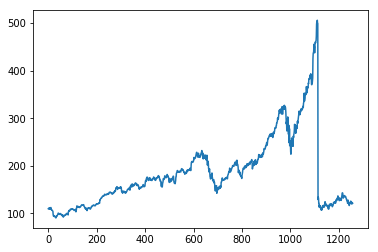

In [19]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [20]:
import numpy as np

In [21]:
df1

0       109.560
1       108.990
2       109.990
3       111.120
4       109.810
5       110.960
6       108.540
7       108.660
8       109.020
9       110.440
10      112.040
11      112.100
12      109.850
13      107.480
14      106.910
15      107.130
16      105.970
17      105.680
18      105.080
19      104.350
20       97.820
21       94.830
22       93.740
23       93.640
24       95.180
25       94.190
26       93.240
27       92.720
28       92.790
29       93.420
         ...   
1228    135.370
1229    133.190
1230    130.840
1231    129.710
1232    129.870
1233    126.000
1234    125.860
1235    125.350
1236    120.990
1237    121.260
1238    127.790
1239    125.120
1240    122.060
1241    120.130
1242    121.420
1243    116.360
1244    121.085
1245    119.980
1246    121.960
1247    121.030
1248    123.990
1249    125.570
1250    124.760
1251    120.530
1252    119.990
1253    123.390
1254    122.540
1255    120.090
1256    120.590
1257    121.210
Name: close, Length: 125

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
print(df1)

[[0.04622971]
 [0.04485869]
 [0.04726398]
 ...
 [0.07155743]
 [0.07276007]
 [0.07425135]]


In [24]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [25]:
training_size,test_size

(817, 441)

In [26]:
train_data

array([[0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.019

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),
          epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 533ms/step - loss: 0.0090 - val_loss: 0.0489
Epoch 2/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0021 - val_loss: 0.0234
Epoch 3/100
12/12 [==============================] - 4s 324ms/step - loss: 0.0010 - val_loss: 0.0204
Epoch 4/100
12/12 [==============================] - 4s 303ms/step - loss: 6.2101e-04 - val_loss: 0.0199
Epoch 5/100
12/12 [==============================] - 4s 293ms/step - loss: 4.3904e-04 - val_loss: 0.0202
Epoch 6/100
12/12 [==============================] - 3s 291ms/step - loss: 4.2623e-04 - val_loss: 0.0190
Epoch 7/100
12/12 [==============================] - 4s 302ms/step - loss: 3.9662e-04 - val_loss: 0.0184
Epoch 8/100
12/12 [==============================] - 4s 299ms/step - loss: 3.6324e-04 - val_loss: 0.0183
Epoch 9/100
12/12 [==============================] - 4s 303ms/step - loss: 3.6293e-04 - val_loss: 0.0178
Epoch 10/100
12/12 [==============================] - 4s 299ms/step

In [37]:
import tensorflow as tf

In [38]:
tf.__version__

'2.2.0'

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [40]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

167.57196605212602

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

248.74897816976673

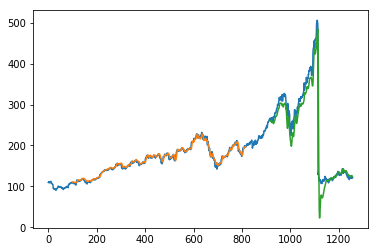

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

441

In [45]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.097606734816596

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08058416]
101
1 day input [0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295
 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474
 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752
 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822
 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824
 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443
 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431
 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219
 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646
 0.06258569 0.07395069 0.07129284

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

1258

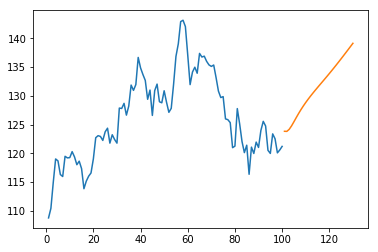

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

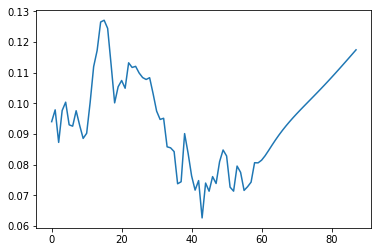

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

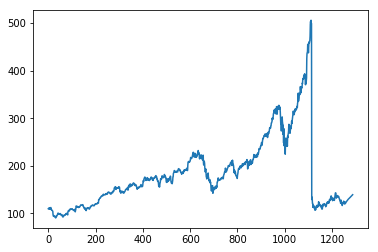

In [55]:
plt.plot(df3)